Ocean Acidifcation: A Call for Climate Awareness
====

### CHE 116: Numerical Methods and Statistics

*Janson Ho*

Introduction
====

Climate change, once a minor concern in the future, has quickly escalated into an issue of the present day. Since the Industrial Revolution in the early 1800s, the emission of greenhouse gases into the atmosphere has resulted in significant alterations in the Earth's regulation of the biosphere. Recently in 2015, carbon dioxide concentrations in the atmosphere surpassed 400 parts per million, an unprecedented mark that has raised serious concerns about the future of the planet. A mere 200 years earlier, carbon dioxide concentrations fluctuated around 300 ppm. The ever increasing emission of carbon dioxide and other harmful greenhouse gases into the atmosphere have caused major problems, particularly global warming and the melting of the ice caps located at the North and South Poles.

While global warming remains the major problem facing the atmosphere, greenhouse gas emissions are impacting other facets of the ecosystem. Ocean acidifcation is becoming an alarming issue facing oceanic wildlife. As carbon dioxide concentrations continue to rise in the atmosphere, the oceans act as a buffer system. Carbon dioxide interacts with the oceanic water to form carbonic acid, lowering the pH in the oceans and increasing acidity. Many marine organisms grow shells and skeletons comprised of calcium carbonate, which are easily degraded under acidic conditions. The rise in acidity of the oceans by 30% over the past 250 years has resulted in the degradation of shelled marine organisms, including oysters, clams, and especially coral reefs. 

The purpose of this project is to explore the change in ocean acidity over time and determine whether this change has resulted from human industrialization and the emission of carbon dioxide into the atmosphere. EPA ocean and atmospheric data measured at three locations from 1983-2012 provides information about time, ocean acidity and the partial pressure of carbon dioxide in the atmosphere. Tests and regressions will be applied to characterize the collected data. A Wilcoxon Sum of Ranks test will be done to compare data from all three locations and identify whether they arise from the same distribution. This may reveal whether certain regions of the world experience greater changes in acidity than other regions. Linear regression will also be important in determining whether greenhouse gas emissions and the ocean acidity are correlated. This project aims to provide insight into the changes facing the oceans as a result of climate change.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as opt
import scipy.linalg as linalg

In [2]:
#import the data
data = pd.read_csv('ocean_acidity.csv')
#assign data
hyear = np.array(data['Hawaii Year'][0:242])
hph = np.array(data['Hawaii pH'][0:242])
hpco2 = np.array(data['Hawaii pCO2'][0:242])
cyear = np.array(data['Canary Islands Year'][0:143])
cph = np.array(data['Canary Islands pH'][0:143])
cpco2 = np.array(data['Canary Islands pCO2'][0:143])
byear = np.array(data['Bermuda Year'][0:379])
bph = np.array(data['Bermuda pH'][0:379])
bpco2 = np.array(data['Bermuda pCO2'][0:379])

Hypothesis Testing 1: Wilcoxon Sum of Ranks Test
====
Ocean Acidity
----

Hypothesis testing remains one of the most useful techniques to accept and reject statistical hypotheses. Hypothesis testing revolves around the **null hypothesis**, a statement of the opposite hypothesis in which one is interested in proving. The null hypothesis is frequently an assumption of no difference or no correlation between data. The whole premise around conducting a hypothesis test is to reject the null hypothesis, which indicates a difference or correlation in the data. Ultimately, hypothesis testing is applied to disprove the null hypothesis using statistics to make a conclusion about the data.

The Wilcoxon Sum of Ranks test is a frequently used method to determine whether two datasets share the same distribution. The Sum of Ranks test takes in two unmatched datasets of the same measurements, which don't necessarily have to be the same size. The test then compares the data and identifies whether the two datasets originate from the same parent group of data. The Wilcoxon Sum of Ranks test is accessed in Python with `scipy.stats.ranksums`.

The Wilcoxon Sum of Ranks test is applied to determine whether data collected on ocean acidity at Hawaii, Canary Islands, and Bermmuda share the same parent group of data. The test will help in identifying whether the ocean region has an impact on ocean acidity. The null hypothesis is that the two sets of data come from the same distribution, therefore the region does not influence a difference in acidity. By testing the null hypothesis, a p-value will be obtained and compared with the alpha value of 0.05 to disprove or accept the null hypothesis. A total of three sum of ranks tests will be compared to determine whether there are differences in acidity between Hawaii (Pacific), the Canary Islands (East Atlantic), and Bermuda (West Atlantic). 

In [3]:
def sum_of_ranks(x,y):
    '''Conducts the Wiilcoxon Sum of Ranks hypothesis test, returns p-value and meaning
    args:
    x = dataset 1
    y = dataset 2'''
    n, p = ss.ranksums(x,y)
    if p < 0.05:
        print('The p-value = {} is less than alpha = 0.05, therefore the null hypothesis is rejected and ' 
              'the two sets of data come from different distributions.'.format(p))
    else:
        print('The p-value = {} is greater than alpha = 0.05, therefore the null hypothesis is supported'
              'and it can be assumed that the two sets of data come from the same distribution.'.format(p))
    return p

p1 = sum_of_ranks(hph,cph)
p2 = sum_of_ranks(hph,bph)
p3 = sum_of_ranks(cph,bph)

The p-value = 0.034873434412909306 is less than alpha = 0.05, therefore the null hypothesis is rejected and the two sets of data come from different distributions.
The p-value = 0.010036965094369141 is less than alpha = 0.05, therefore the null hypothesis is rejected and the two sets of data come from different distributions.
The p-value = 0.00020457421397475887 is less than alpha = 0.05, therefore the null hypothesis is rejected and the two sets of data come from different distributions.


Based on the results of the Wilcoxon Sum of Ranks tests, it can be confidently confirmed that the data collected from Hawaii, Canary Islands, and Bermuda all come from different distributions. This suggests that the region of the ocean does play a role in the acidity of the water. Hawaii resides in the Pacific Ocean, the Canary Islands reside in the East Atlantic, and Bermuda lies in the West Atlantic. All these locations and regions in the oceans of the world have separate influences, and therefore have different acidity distributions.  

#### Histograms of Data

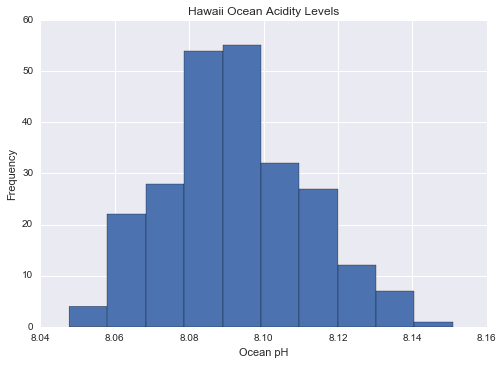

In [4]:
plt.title('Hawaii Ocean Acidity Levels')
plt.xlabel('Ocean pH')
plt.ylabel('Frequency')
plt.hist(hph)
plt.show()

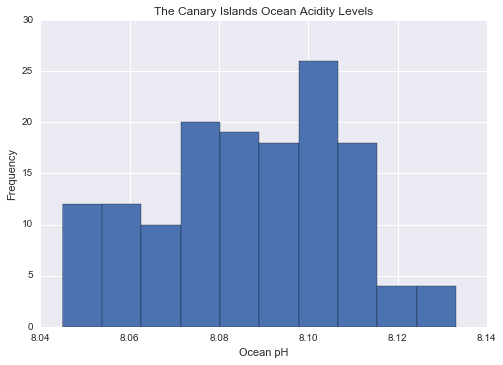

In [5]:
plt.title('The Canary Islands Ocean Acidity Levels')
plt.xlabel('Ocean pH')
plt.ylabel('Frequency')
plt.hist(cph)
plt.show()

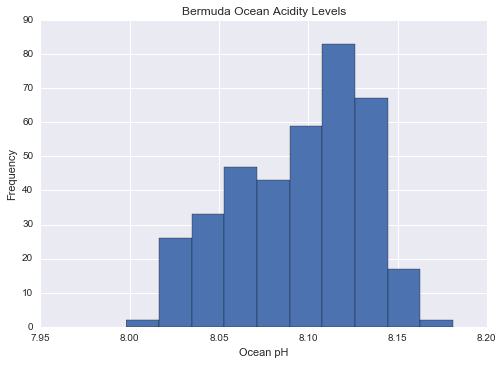

In [6]:
plt.title('Bermuda Ocean Acidity Levels')
plt.xlabel('Ocean pH')
plt.ylabel('Frequency')
plt.hist(bph)
plt.show()

As shown from the histogram plots of the three separate sets of data, it is apparent that they all come from different distributions. The distribution of the acidity data for Hawaii is centered at 8.095 with a range from 8.05 to 8.15. The distribution of the acidity data for the Canary Islands is centered at 8.09 ranging from 8.05 to 8.13. The distribution of the acidity data for Bermuda is centered around 8.08 ranging between 7.99 and 8.18. The distributions and ranges are all very different in appearance, and the Wilcoxon Sum of Ranks test confirms that all sets of data come from different sample distributions. This indicates that location does play a role in the acidity of the ocean, and different regions will have different expected pH fluctuations. 

Hypothesis Testing 2: Wilcoxon Sum of Ranks Test
====
Carbon Dioxide Partial Pressure
----

Similarly, the Wilcoxon Sum of Ranks test will be applied to determine whether the data collected on the partial pressure of carbon dioxide at Hawaii, Canary Islands, and Bermuda share the same parent group of data. This test will aid in confirming whether or not ocean regions have an impact on carbon dioxide concentrations. The null hypothesis is that the two sets of data come from tthe same distribution, thus the region of the world does not impact the distribution of carbon dioxide in the atmosphere. By testing the null hypothesis, a p-value will be compared to the alpha value to either disprove or accept it. A total of three sum of ranks tests will be conducted to identify whether there are significant differences in carbon dioxide pressures in the three locations.

In [7]:
p4 = sum_of_ranks(hpco2,cpco2)
p5 = sum_of_ranks(hpco2,bpco2)
p6 = sum_of_ranks(cpco2,bpco2)

The p-value = 5.529480659469861e-17 is less than alpha = 0.05, therefore the null hypothesis is rejected and the two sets of data come from different distributions.
The p-value = 0.008847420656556223 is less than alpha = 0.05, therefore the null hypothesis is rejected and the two sets of data come from different distributions.
The p-value = 7.314015119344432e-15 is less than alpha = 0.05, therefore the null hypothesis is rejected and the two sets of data come from different distributions.


As apparent from the results of the sum of ranks tests, all the data collected from the three locations come from different distributions. This suggests that the region of the ocean also plays a role in the carbon dioxide concentrations and partial pressures. This is consistent with the results attained from hypothesis testing of the ocean acidity, shown above.

#### Histograms of Data

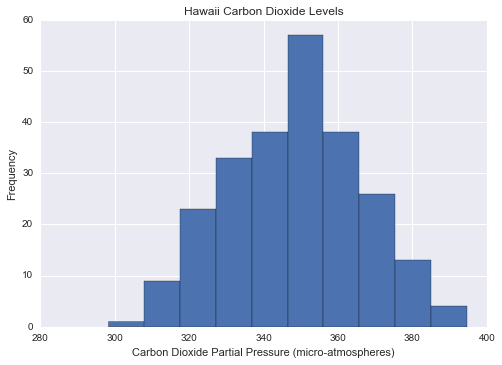

In [8]:
plt.title('Hawaii Carbon Dioxide Levels')
plt.xlabel('Carbon Dioxide Partial Pressure (micro-atmospheres)')
plt.ylabel('Frequency')
plt.hist(hpco2)
plt.show()

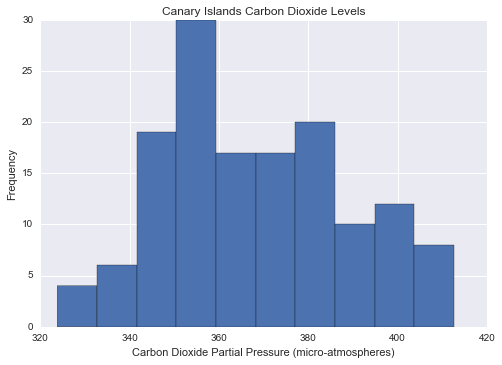

In [9]:
plt.title('Canary Islands Carbon Dioxide Levels')
plt.xlabel('Carbon Dioxide Partial Pressure (micro-atmospheres)')
plt.ylabel('Frequency')
plt.hist(cpco2)
plt.show()

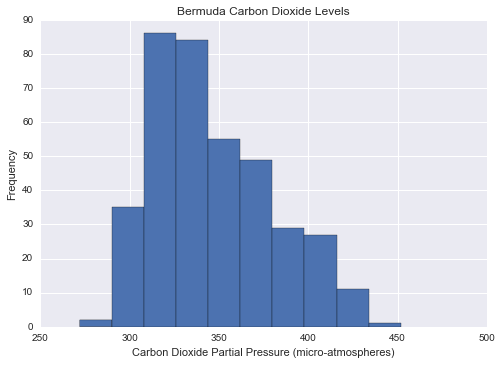

In [10]:
plt.title('Bermuda Carbon Dioxide Levels')
plt.xlabel('Carbon Dioxide Partial Pressure (micro-atmospheres)')
plt.ylabel('Frequency')
plt.hist(bpco2)
plt.show()

As shown from the histogram plots of the three separate sets of data, it is apparent that they all come from different distributions. The distribution of the acidity data for Hawaii is centered around 352 microatmospheres with a range from 295 to 395. The distribution of the acidity data for the Canary Islands is centered at 368 ranging from 325 to 410. The distribution of the acidity data for Bermuda is centered around 355 ranging between 275 and 450. The distributions and ranges are all very different in appearance, and the Wilcoxon Sum of Ranks test confirms that all sets of data come from different sample distributions. This indicates that location does play a role in the partial pressure of carbon dioxide of the ocean, and different regions will have different expected carbon dioxide concentration fluctuations. 

Hypothesis Testing 3: Spearman's Correlation Test
====

The Spearman's Correlation Test is a frequently used method to determine whether two sets of data are correlated using p-values. The test takes in two matched datasets, each of which measure a different parameter. Datasets are matched, therefore there are equal number of values for both datasets. The correlation test returns a correlation value r and the p-value of the correlation term. The Spearman's Correlation Test is a non-parametric hypothesis test, analyzing only the data and making no assumptions. In comparison, the Pearson Correlation Test assumes that the residual errors in the correlation are normally distributed. The Spearman's Correlation Test is accessed in Python with `scipy.stats.spearmanr`.

The Spearman's Correlation Test is applied to identify whether the acidity of the ocean and the carbon dioxide pressures at the three locations are correlated. The two sets of data will be compared for each of the three locations to determine whether there is a correlation. The null hypothesis is that the two datasets are uncorrelated, thus the carbon dioxide pressures and acidity are completely independent of one another. By testing the null hypothesis, a p-value will be obtained via this test and compared to the alpha value of 0.05 to prove or disprove it. A total of three Spearman's Correlation Tests will be conducted for each of the three locations in Hawaii, the Canary Islands, and Bermuda.

In [11]:
def spearman(x,y):
    '''Computes the Spearman Correlation for the two given datasets and returns the p-value and meaning
    args:
    x = dataset 1
    y = dataset 2'''
    alpha = 0.05
    r,p = ss.spearmanr(x,y)
    if p < alpha:
        print('The p-value = {} is less than alpha = 0.05, therefore the null hypothesis is rejected and the ocean '
              'acidity and carbon dioxide partial pressure are correlated.'.format(p))
    else:
        print('The p-value = {} is less than alpha = 0.05, therefore the null hypothesis is accepted and the datasets are'
             'uncorrelated'.format(p))
    return p

p7 = spearman(hph,hpco2)
p8 = spearman(cph,cpco2)
p9 = spearman(bph,bpco2)

The p-value = 2.201157763211735e-209 is less than alpha = 0.05, therefore the null hypothesis is rejected and the ocean acidity and carbon dioxide partial pressure are correlated.
The p-value = 1.7566760111592044e-203 is less than alpha = 0.05, therefore the null hypothesis is rejected and the ocean acidity and carbon dioxide partial pressure are correlated.
The p-value = 0.0 is less than alpha = 0.05, therefore the null hypothesis is rejected and the ocean acidity and carbon dioxide partial pressure are correlated.


It is evident through the Spearman's Correlation Test that the two datasets are correlated, with a p-value below the alpha value of 0.05. This suggests that the ocean acidity level and the carbon dioxide partial pressure and subsequently concentration are correlated, at all three locations of Hawaii, the Canary Islands, and Bermuda. 

Ordinary Least Squares Linear Regression - 1D
====

Hawaii Ocean Acidity and Carbon Dioxide Partial Pressure
----
#### Justify correlation

In justifying correlation, a plot of the data was produced to show the dataset scatter. A Spearman Correlation test was also utilized to confirm whether or not a correlation should exist between the data.

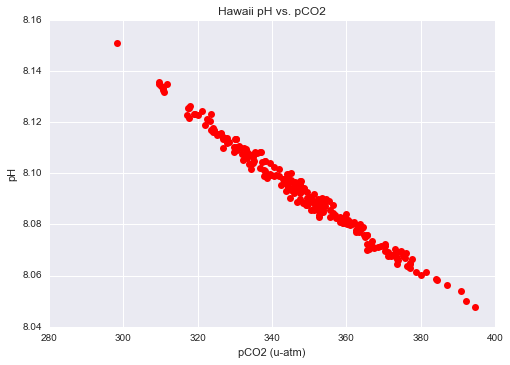

P-value = 2.20115776321e-209


In [12]:
plt.plot(hpco2,hph,'ro')
plt.xlabel('pCO2 (u-atm)')
plt.ylabel('pH')
plt.title('Hawaii pH vs. pCO2')
plt.show()
print('P-value =',p7)

Through the Spearman Correlation Test, it was shown that the p-value is less than $\alpha = 0.05$, therefore the null hypothesis is rejected. There is likely to be a correlation between the data.

#### Compute model coefficients

A linear model was selected for the regression through ordinary least squares in one dimension. The two model coefficients $\alpha $ and $ \beta $ represent the intercept and slope, respectively, of the best fit line. These model coefficients will be calculated through a series of relations with the data and analytics.

$$ \hat y =\hat \alpha +\hat \beta x $$

$$\hat{\beta} = \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2}$$

$$\hat{\beta} = \frac{\sigma_{xy}}{\sigma_x^2}$$

$$\hat{\alpha} = \frac{1}{N}\sum_i (y_i - \hat{\beta}x_i)$$

Where:

$ \bar{x} = $sample mean of x

$ \bar{y} = $ sample mean of y

$ \sigma_{xy} =$ sample covariance of x and y

$ \sigma_x^2 = $ sample variance of x

In [13]:
covh = np.cov(hpco2,hph, ddof=2)
beta_hath = covh[0,1] / covh[0,0]
print('Beta =',beta_hath)
alpha_hath = np.mean( hph - beta_hath * hpco2)
print('Alpha =',alpha_hath)

Beta = -0.00101595356419
Alpha = 8.44655690898


$$ \alpha = 8.44655690898 $$

$$ \beta = -0.00101595356419 $$

#### Standard Error Analysis

Standard error analysis provides insight into the deviation of the best fit regression from the actual observed data.

$$ \hat y = \hat \alpha + \hat \beta x $$

$$S^2_{\epsilon} =\frac{\sigma^2_{\epsilon}}{N - D} =  \frac{1}{N - D}\sum_i \left(\hat{y}_i - y_i\right)^2$$

$$S^2_{\alpha} = S^2_{\epsilon} \left[ \frac{1}{N - D} + \frac{\bar{x}^2}{\sum_i\left(x_i - \bar{x}\right)^2}\right]$$

$$S^2_{\beta} = \frac{S^2_{\epsilon}}{\sum_i \left(x_i - \bar{x}\right)^2}$$

Where:

$S^2_{\epsilon} = $ variance of $\epsilon$, the noise factor

$S^2_{\alpha} = $ variance of $\alpha$, the intercept

$S^2_{\beta} = $ variance of $\beta$, the slope

In [14]:
hyhat = alpha_hath+beta_hath*hpco2
dfh = len(hpco2) - 2
s2_epsilonh = np.sum((hph - hyhat) ** 2) / dfh
s2_alphah =  s2_epsilonh * (1. / dfh + np.mean(hpco2) ** 2 / (np.sum((np.mean(hpco2) - hpco2) ** 2)))
s2_betah = s2_epsilonh / np.sum((hpco2 - np.mean(hpco2))**2)
print('The standard error for the intercept is', sqrt(s2_alphah))
print('The standard error for the slope is', sqrt(s2_betah))
print('The standard error for the noise is', sqrt(s2_epsilonh))

The standard error for the intercept is 0.0028510244259618575
The standard error for the slope is 8.168457277737149e-06
The standard error for the noise is 0.002309989528880319


A confidence interval can provide further insight into the range where the true correlation coefficients would potentially lie if the data perfectly fit.

$$P(\beta = \hat{\beta} \pm y) = 0.95$$

$$T = \frac{y}{S_\beta}$$

$$y = TS_\beta$$

Thus, the confidence interval is:

$$\beta = \hat{\beta} \pm TS_\beta$$ with 95% confidence

In [15]:
Th = ss.t.ppf(0.975, len(hpco2) - 2)
print('alpha =',alpha_hath, '+/-', Th * sqrt(s2_alphah), 'with 95% confidence')
print('beta = ', beta_hath, '+/-', Th * sqrt(s2_betah), ' with 95% confidence')

alpha = 8.44655690898 +/- 0.00561622627425 with 95% confidence
beta =  -0.00101595356419 +/- 1.60910246736e-05  with 95% confidence


#### Plot Regressed Model

The regression model is plotted against the scatter data to demonstrate how well the regression fits.

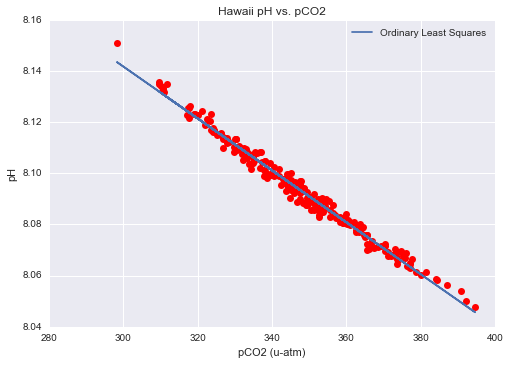

In [16]:
plt.plot(hpco2,hph,'ro')
plt.plot(hpco2,hyhat,label='Ordinary Least Squares')
plt.xlabel('pCO2 (u-atm)')
plt.ylabel('pH')
plt.legend(loc='upper right')
plt.title('Hawaii pH vs. pCO2')
plt.show()

The goodness of fit serves to show the extent to which the observed data match the values expected by the theoretical regression model.

$$R^2 = 1 - \frac{\textrm{SSR}}{\textrm{TSS}} = 1 - \frac{\sum_i \left(\hat{y}_i - y\right)^2}{\sum_i \left(\bar{y} - y\right)^2}$$

SSR = sum of squared residuals = $\sum_i \left(\hat{y}_i - y\right)^2$

TSS = total sum of squares = $\sum_i \left(\bar{y} - y\right)^2$

In [17]:
ssrh = np.sum((hyhat-hph)**2)
tssh = np.sum((np.mean(hph) - hph)**2)
rsqh = 1 - ssrh / tssh
print('R^2 =',rsqh)

R^2 = 0.984722320632


#### Normality Test

In conducting an effective regression analysis, an assumption is made that the residuals follow a normal distribution. A Shapiro-Wilks hypothesis test is performed to analyze the normality of the residuals. The null hypothesis is that the residuals from the regression are normally distributed.

In [18]:
sh,ph = ss.shapiro(hph-hyhat)
print('P-value =',ph)

P-value = 0.5784146189689636


Since the p-value is greater than $\alpha = 0.05$, we fail to reject the null hypothesis. Therefore, we support the null hypothesis that the residuals are normally distributed, so our model equation is likely good.

A histogram plot of the residuals is created to demonstrate the normal distribution character.

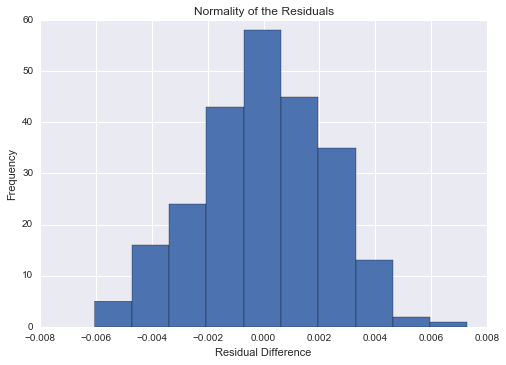

In [19]:
plt.hist(hph-hyhat)
plt.xlabel('Residual Difference')
plt.ylabel('Frequency')
plt.title('Normality of the Residuals')
plt.show()

Based on the Shapiro-Wilks Normality Test, we are able to model an ordinary least squares regression to this data. It is evident from the calculated $\alpha$ and $\beta$ values and plot of the best fit line that there is a correlation between the acidity and partial pressure of carbon dioxide in Hawaii. The residuals appear normally distributed upon plotting in a histogram. The regression model is a good fit for the data.We can conclude that as the the partial pressure of carbon dioxide increases, the acidity of the ocean decreases. This is consistent with the observations seen in ocean acidification throughout the world.

The Canary Islands Ocean Acidity and Carbon Dioxide Partial Pressure
----
#### Justify Correlation

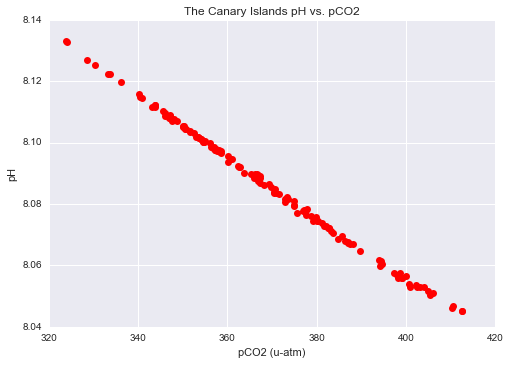

P-value = 1.75667601116e-203


In [20]:
plt.plot(cpco2,cph,'ro')
plt.xlabel('pCO2 (u-atm)')
plt.ylabel('pH')
plt.title('The Canary Islands pH vs. pCO2')
plt.show()
print('P-value =',p8)

Through the Spearman Correlation Test, it was shown that the p-value is less than $\alpha = 0.05$, therefore the null hypothesis is rejected. There is likely to be a correlation between the data.

#### Compute model coefficients

$$ \hat y = \hat \alpha + \hat \beta x $$

In [21]:
covc = np.cov(cpco2,cph, ddof=2)
beta_hatc = covc[0,1] / covc[0,0]
print('Beta =',beta_hatc)
alpha_hatc = np.mean( cph - beta_hatc * cpco2)
print('Alpha =',alpha_hatc)

Beta = -0.00100060873227
Alpha = 8.45544560533


$$ \alpha = 8.45544560533 $$

$$ \beta = -0.00100060873227 $$

#### Standard Error Analysis

$$ \hat y = \hat \alpha + \hat \beta x $$

In [22]:
cyhat = alpha_hatc+beta_hatc*cpco2
dfc = len(cpco2) - 2
s2_epsilonc = np.sum((cph - cyhat) ** 2) / dfc
s2_alphac =  s2_epsilonc * (1. / dfc + np.mean(cpco2) ** 2 / (np.sum((np.mean(cpco2) - cpco2) ** 2)))
s2_betac = s2_epsilonc / np.sum((cpco2 - np.mean(cpco2))**2)
print('The standard error for the intercept is', sqrt(s2_alphac))
print('The standard error for the slope is', sqrt(s2_betac))
print('The standard error for the noise is', sqrt(s2_epsilonc))

The standard error for the intercept is 0.001233535643761007
The standard error for the slope is 3.3426263284386815e-06
The standard error for the noise is 0.0008256700366251792


In [23]:
Tc = ss.t.ppf(0.975, len(cpco2) - 2)
print('alpha =',alpha_hatc, '+/-', Tc * sqrt(s2_alphac), 'with 95% confidence')
print('beta = ', beta_hatc, '+/-', Tc * sqrt(s2_betac), ' with 95% confidence')

alpha = 8.45544560533 +/- 0.00243861545649 with 95% confidence
beta =  -0.00100060873227 +/- 6.60814324338e-06  with 95% confidence


#### Plot Regressed Model

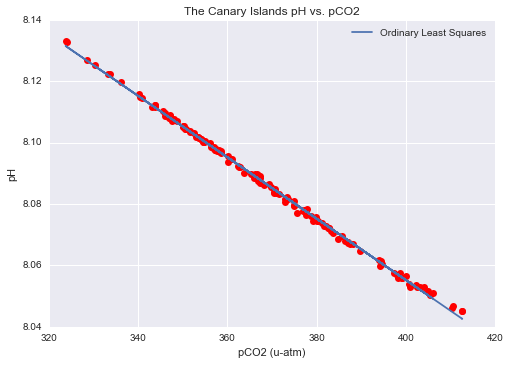

In [24]:
plt.plot(cpco2,cph,'ro')
plt.plot(cpco2,cyhat,label='Ordinary Least Squares')
plt.xlabel('pCO2 (u-atm)')
plt.ylabel('pH')
plt.legend(loc='upper right')
plt.title('The Canary Islands pH vs. pCO2')
plt.show()

In [25]:
ssrc = np.sum((cph - cyhat)**2)
tssc = np.sum((np.mean(cph) - cph)**2)
rsqc = 1 - ssrc / tssc
print('R^2 =',rsqc)

R^2 = 0.998428974009


#### Normality Test

In [26]:
sc, pc = ss.shapiro(cph-cyhat)
print('P-value =',pc)

P-value = 0.17732487618923187


Since the p-value is greater than $\alpha = 0.05$, we fail to reject the null hypothesis. Therefore, we support the null hypothesis that the residuals are normally distributed, so our model equation is likely good.

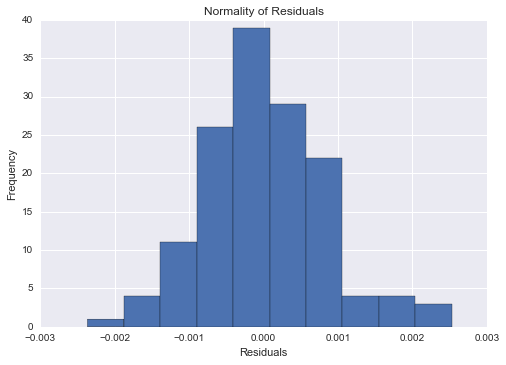

In [27]:
plt.hist(cph-cyhat)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Residuals')
plt.show()

The residuals appear normally distributed upon plotting in a histogram. The regression model is a good fit.

Bermuda Ocean Acidity and Carbon Dioxide Partial Pressure
----
#### Justify Correlation

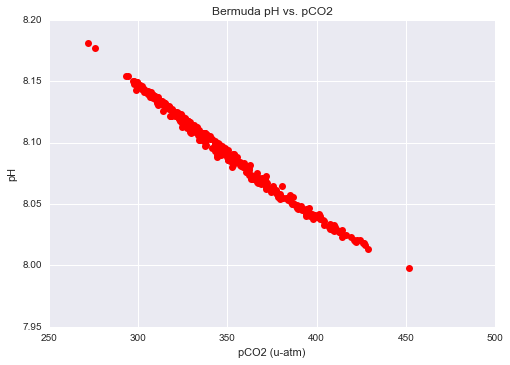

P-value = 0.0


In [28]:
plt.plot(bpco2,bph,'ro')
plt.xlabel('pCO2 (u-atm)')
plt.ylabel('pH')
plt.title('Bermuda pH vs. pCO2')
plt.show()
print('P-value =',p9)

Through the Spearman Correlation Test, it was shown that the p-value is less than $\alpha = 0.05$, therefore the null hypothesis is rejected. There is likely to be a correlation between the data.

#### Compute model coefficients

$$ \hat y = \hat \alpha + \hat \beta x $$

In [29]:
covb = np.cov(bpco2,bph, ddof=2)
beta_hatb = covb[0,1] / covb[0,0]
print('Beta =',beta_hatb)
alpha_hatb = np.mean( bph - beta_hatb * bpco2)
print('Alpha =',alpha_hatb)

Beta = -0.00107030508941
Alpha = 8.46625174827


$$ \alpha = 8.46625174827$$

$$ \beta = -0.00107030508941$$

#### Standard Error Analysis

$$ \hat y = \hat \alpha + \hat \beta x $$


In [30]:
byhat = alpha_hatb+beta_hatb*bpco2
dfb = len(bpco2) - 2
s2_epsilonb = np.sum((bph - byhat) ** 2) / dfb
s2_alphab =  s2_epsilonb * (1. / dfb + np.mean(bpco2) ** 2 / (np.sum((np.mean(bpco2) - bpco2) ** 2)))
s2_betab = s2_epsilonb / np.sum((bpco2 - np.mean(bpco2))**2)
print('The standard error for the intercept is', sqrt(s2_alphab))
print('The standard error for the slope is', sqrt(s2_betab))
print('The standard error for the noise is', sqrt(s2_epsilonb))

The standard error for the intercept is 0.001698320842028383
The standard error for the slope is 4.875965143584508e-06
The standard error for the noise is 0.0032094795195289137


In [31]:
Tb = ss.t.ppf(0.975, len(bpco2) - 2)
print('alpha =',alpha_hatb, '+/-', Tb * sqrt(s2_alphab), 'with 95% confidence')
print('beta = ', beta_hatb, '+/-', Tb * sqrt(s2_betab), ' with 95% confidence')

alpha = 8.46625174827 +/- 0.00333936817035 with 95% confidence
beta =  -0.00107030508941 +/- 9.58749512888e-06  with 95% confidence


#### Plot Regressed Model

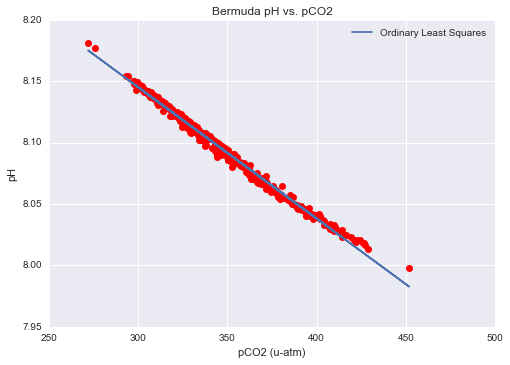

In [32]:
plt.plot(bpco2,bph,'ro')
plt.plot(bpco2,byhat,label='Ordinary Least Squares')
plt.xlabel('pCO2 (u-atm)')
plt.ylabel('pH')
plt.legend(loc='upper right')
plt.title('Bermuda pH vs. pCO2')
plt.show()

In [33]:
ssrb = np.sum((bph - byhat)**2)
tssb = np.sum((np.mean(bph) - bph)**2)
rsqb = 1 - ssrb / tssb
print('R^2 =',rsqb)

R^2 = 0.992236411397


#### Normality Test

In [34]:
sb, pb = ss.shapiro(bph-byhat)
print('P-value =',pb)

P-value = 4.6662012209708337e-07


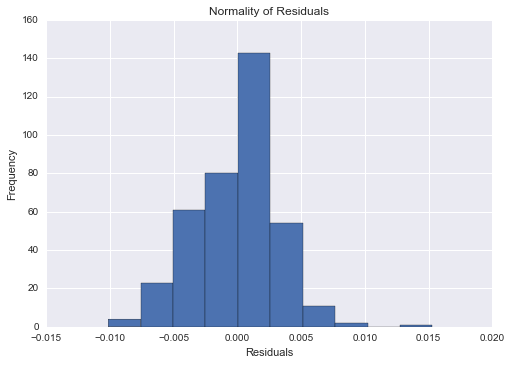

In [35]:
plt.hist(bph-byhat)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Residuals')
plt.show()

As shown in the Shapiro-Wilks test, the p-value is less than $\alpha = 0.05$, therefore the null hypothesis is rejected. This  suggests that the residuals are not normally distributed, and this is true based on the histogram of the residuals. A linear regression is not a good fit for this data, and a different regression model should be tested. A polynomial fit will be tested to see if the data is better correlated.

Ordinary Least Squares Linear Regression - MD
====

#### Compute Model Coefficients

$$ \hat y = \beta_0 + \beta_1 x + \beta_2 x^2$$

$$\hat{y} = {\mathbf X\hat{\beta}}$$

$$\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^Ty$$

In [36]:
x_mat = np.column_stack((np.ones(len(bpco2)),bpco2,bpco2**2))
result = linalg.lstsq(x_mat,bph)
beta_hatp = result[0]
print(beta_hatp)
byhatp = x_mat.dot(beta_hatp)

[  8.65788279e+00  -2.15545610e-03   1.52120615e-06]


$$ \beta_0 = 8.65788279 $$

$$ \beta_1 = -0.00215545610 $$

$$ \beta_2 = 0.00000152120615 $$

#### Standard Error Analysis

$$ f = \beta_0 + \beta_1 x +\beta_2 x^2 $$

In [37]:
resids = byhatp - bph
ssrbp = np.sum(resids**2)
s2_epsilonp = ssrbp / (len(bpco2) - len(beta_hatp))
print('S2_epsilon =',s2_epsilonp)
s2_betap = s2_epsilonp * linalg.inv(x_mat.transpose().dot(x_mat))
print('S2_beta =',s2_betap)

S2_epsilon = 6.58603126018e-06
S2_beta = [[  1.73733638e-04  -9.78630392e-07   1.36449451e-09]
 [ -9.78630392e-07   5.52706173e-09  -7.72673680e-12]
 [  1.36449451e-09  -7.72673680e-12   1.08316349e-14]]


In [38]:
for i in range(len(beta_hatp)):
    T = ss.t.ppf(0.975, len(bpco2) - len(beta_hatp)) 
    cwidth = T * np.sqrt(s2_betap[i,i]) 
    print("beta_{} is {} +/- {} with 95% confidence".format(2 - i, beta_hatp[i], cwidth)) 

beta_2 is 8.657882787358334 +/- 0.025917328948097357 with 95% confidence
beta_1 is -0.002155456102193587 +/- 0.00014618251905241126 with 95% confidence
beta_0 is 1.5212061522973147e-06 +/- 2.0464224421460284e-07 with 95% confidence


#### Plot Regressed Model

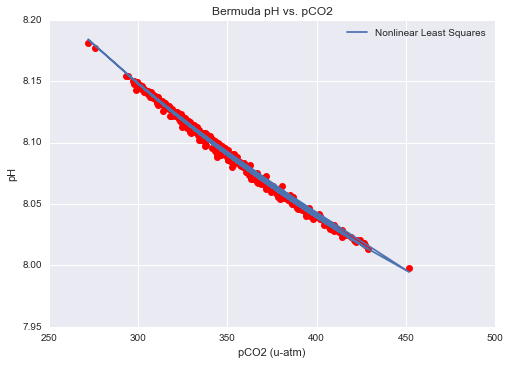

In [39]:
plt.plot(bpco2,bph,'ro')
plt.plot(bpco2,byhatp,label='Nonlinear Least Squares')
plt.xlabel('pCO2 (u-atm)')
plt.ylabel('pH')
plt.legend()
plt.title('Bermuda pH vs. pCO2')
plt.show()

In [40]:
ssrbp = np.sum((bph - byhatp)**2)
rsqbp = 1 - ssrbp / tssb
print('R^2 =',rsqbp)

R^2 = 0.995049334553


#### Normality Test

In [41]:
sbp, pbp = ss.shapiro(bph-byhatp)
print('P-value =',pbp)

P-value = 0.08834069967269897


Since the p-value is greater than $\alpha = 0.05$, we fail to reject the null hypothesis. Therefore, we support the null hypothesis that the residuals are normally distributed, so our model equation is likely good.

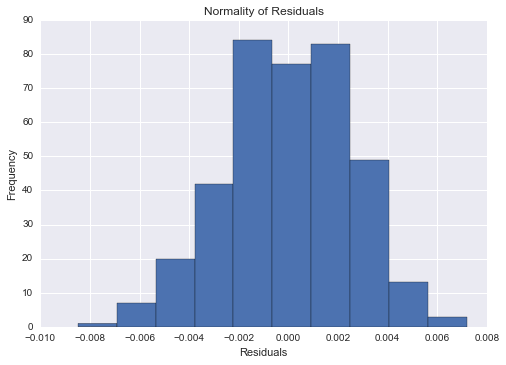

In [42]:
plt.hist(bph-byhatp)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Residuals')
plt.show()

A plot of the residuals in a histogram show that the residuals are likely normally distributed, centered around 0. This suggests that the regression model is a good fit for the data.

Overall Trends
====

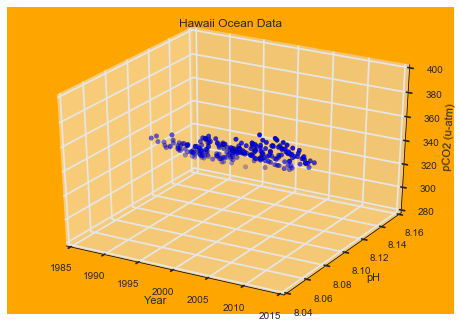

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',axisbg='orange')
ax.scatter(xs=hyear,ys=hph,zs=hpco2,c='b',marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('pH')
ax.set_zlabel('pCO2 (u-atm)')
ax.set_title('Hawaii Ocean Data')
plt.show()

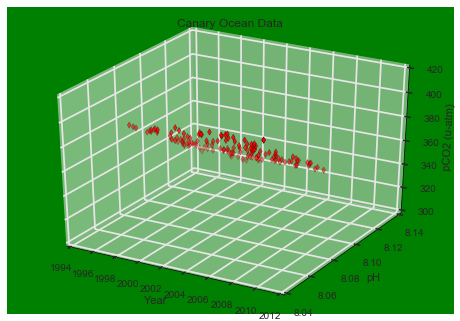

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d',axisbg='g')
ax.scatter(cyear,cph,cpco2,c='r',marker='d')
ax.set_xlabel('Year')
ax.set_ylabel('pH')
ax.set_zlabel('pCO2 (u-atm)')
ax.set_title('Canary Ocean Data')
plt.show()

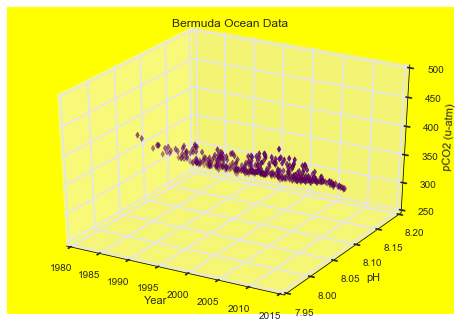

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d',axisbg='yellow')
ax.scatter(byear,bph,bpco2,c='purple',marker='d')
ax.set_xlabel('Year')
ax.set_ylabel('pH')
ax.set_zlabel('pCO2 (u-atm)')
ax.set_title('Bermuda Ocean Data')
plt.show()

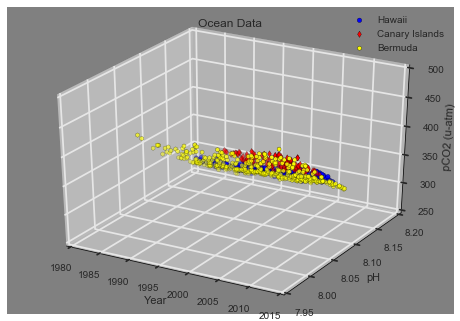

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d',axisbg='gray')
ax.scatter(xs=hyear,ys=hph,zs=hpco2,c='b',marker='o',label='Hawaii')
ax.scatter(cyear,cph,cpco2,c='r',marker='d',label='Canary Islands')
ax.scatter(byear,bph,bpco2,c='yellow',marker='h',label='Bermuda')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('pH')
ax.set_zlabel('pCO2 (u-atm)')
ax.set_title('Ocean Data')
plt.show()

As demonstrated in the 3D plot of all sets of data above, there are similarities in the datasets. Even with the Wilcoxon Sum of Ranks test stating that the datasets all came from different distributions, the same trend is seen throughout all 3 locations. As time approaches the present, the pH level of the ocean decreases and the partial pressure of carbon dioxide increases with respect to each location. Despite being in different distributions, a common trend can be stated about the correlation between the carbon dioxide concentrations and acidity throughout the years. This trend marks the need for change in the global community to push for climate awareness and environmental initiatives to stop this increasing acidity in the ocean and the emission of carbon dioxide into the atmosphere.

Conclusions
====

Through studying the data on location, ocean acidity, and carbon dioxide pressures, several conclusions can be reached. Through Hypothesis Test 1 studying ocean acidity, it was determined that the three datasets collected on ocean acidity at Hawaii, the Canary Islands, and Bermuda all came from different distributions. Therefore, each location had a separate distribution of acidity in their surrounding ocean than each other. Similarly, Hypothesis Test 2 also showed that the carbon dioxide pressures at all three locations came from different distributions. These two hypothesis tests demonstrate that each ocean region maintains a different distribution of carrbon dioxide pressure and acidity. There is no correlation between different oceans.

Hypothesis Test 3 with the Spearman Correlation Test showed that the ocean acidity and carbon dioxide pressures at each individual location were correlated with one another. All locations showed very strong correlations, and linear and polynomial regressions were fitted to the data. All the regressions produced negative correlations, indicating that as the pH decreased, the partial pressure of carbon dioxide increased. This indicates that carbon dioxide emissions are having a negative impact on the acidity of the ocean, and a serious effort must be made to slow and stop the increasing acidity from damaging the oceanic ecosystem.

References
---
##### Ocean acidity data:

EPA Climate Change Indicators in the United States: Ocean Acidity **(2014)** https://www3.epa.gov/climatechange/science/indicators/oceans/acidity.html

##### Climate Change Background

The National Climate Assessment **(2014)** 
http://nca2014.globalchange.gov/highlights/overview/overview

What Passing a Key $CO_2$ Mark Means to Climate Scientists **(2015)** 
http://www.climatecentral.org/news/co2-400-ppm-scientists-meaning-19713

##### Equation References

Introduction to Numerical Methods and Statistics with Jupyter Notebooks and Python **(2016)** 
https://github.com/whitead/numerical_stats